# **Big Data Applications Course Work 1**

# **Impoting Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from pylab import rcParams

In [3]:
#style for the plots
plt.style.use('fivethirtyeight')

# **Load the dataset**

In [4]:
TSLA = pd.read_csv('/kaggle/input/tsla-data1/TSLA.csv')

In [5]:
TSLA['Date'] = pd.to_datetime(TSLA['Date'], infer_datetime_format=True)
TSLA = TSLA.set_index(['Date'])

/tmp/ipykernel_42/1860443790.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  TSLA['Date'] = pd.to_datetime(TSLA['Date'], infer_datetime_format=True)


In [7]:
print(TSLA.head())
print(TSLA.tail())

                Close
Date                 
2019-01-01  20.468000
2019-02-01  21.325333
2019-03-01  18.657333
2019-04-01  15.912667
2019-05-01  12.344000
                 Close
Date                  
2023-08-01  258.079987
2023-09-01  250.220001
2023-10-01  200.839996
2023-11-01  240.080002
2023-12-01  238.720001


In [8]:
#Total number of rows and columns in this data set
TSLA.shape

(60, 1)

In [10]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


In [11]:
TSLA.describe()

,Close
count,60.000000
mean,174.809788
std,110.213054
min,12.344000
25%,50.227165
50%,206.585007
75%,254.084991
max,381.586670


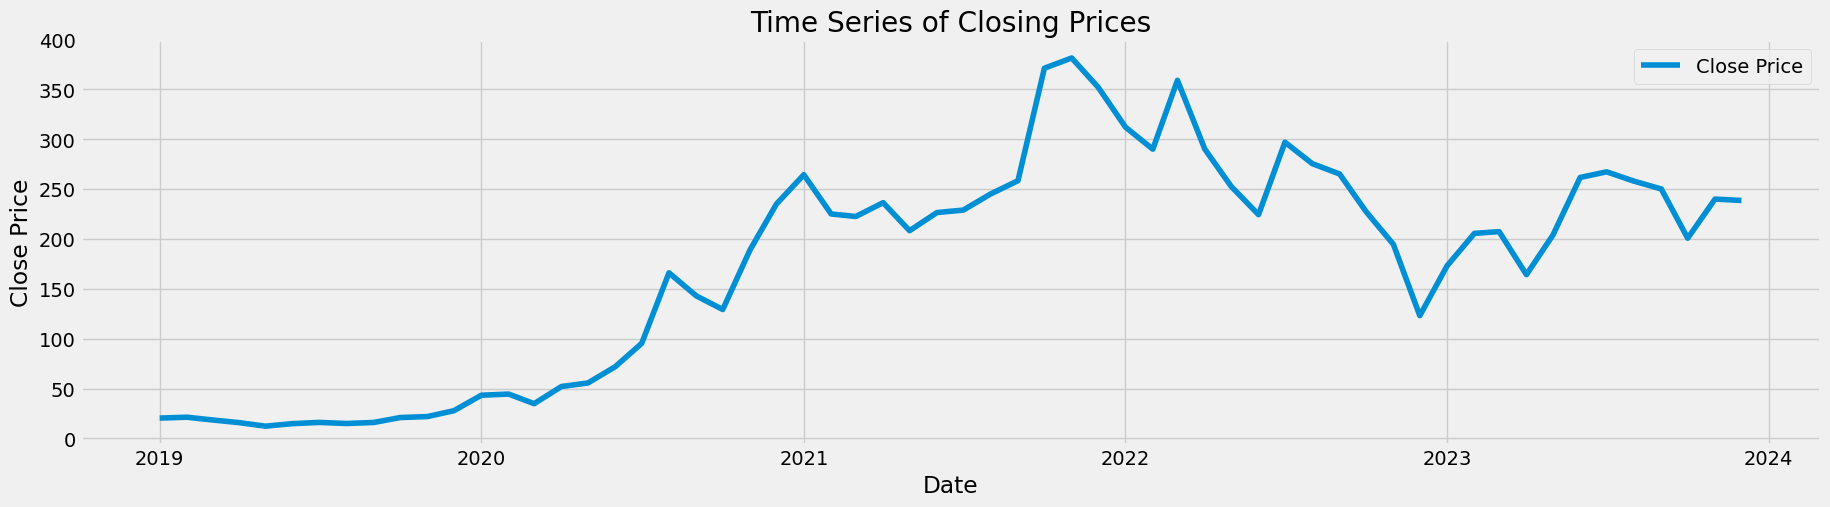

In [6]:
import seaborn as snsplt.figure(figsize=(20, 5))
plt.plot(TSLA['Close'], label='Close Price')
plt.title('Time Series of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# **Histogram plot**

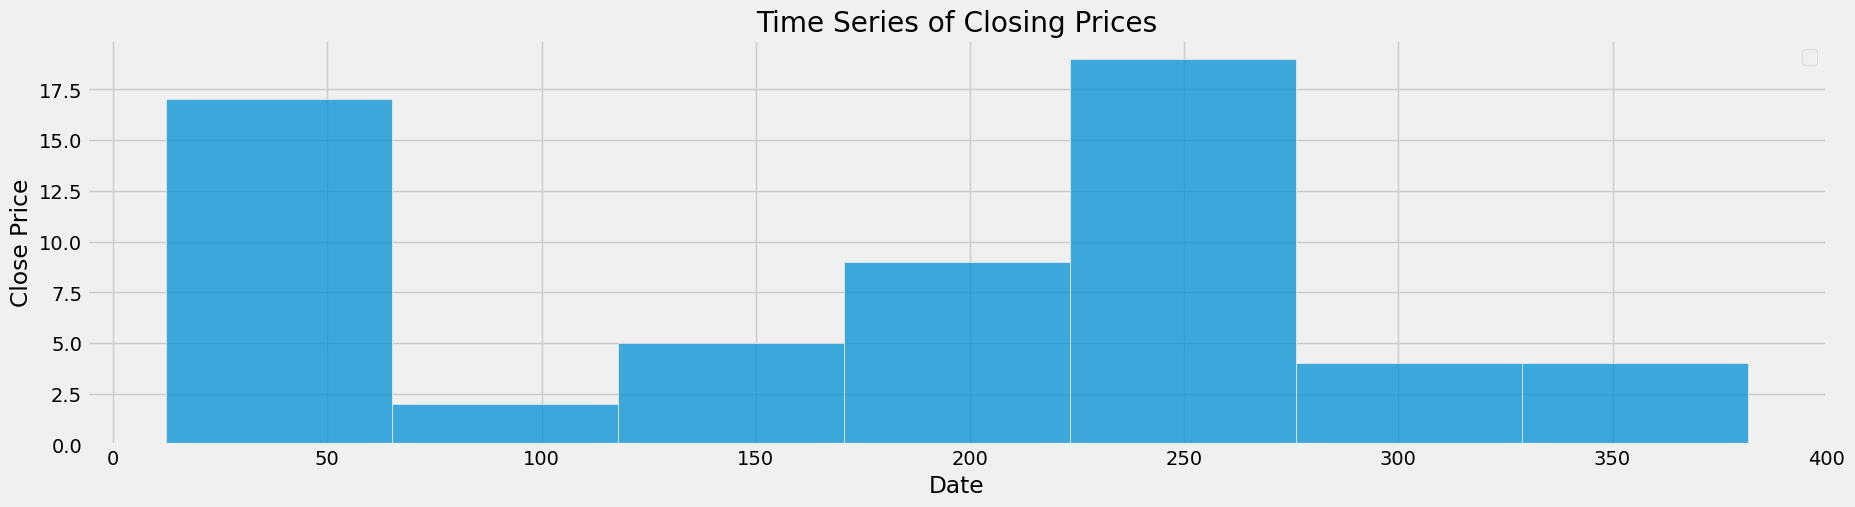

In [18]:
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.histplot(TSLA['Close'])
plt.title('Time Series of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# **Autocorrelation plot**

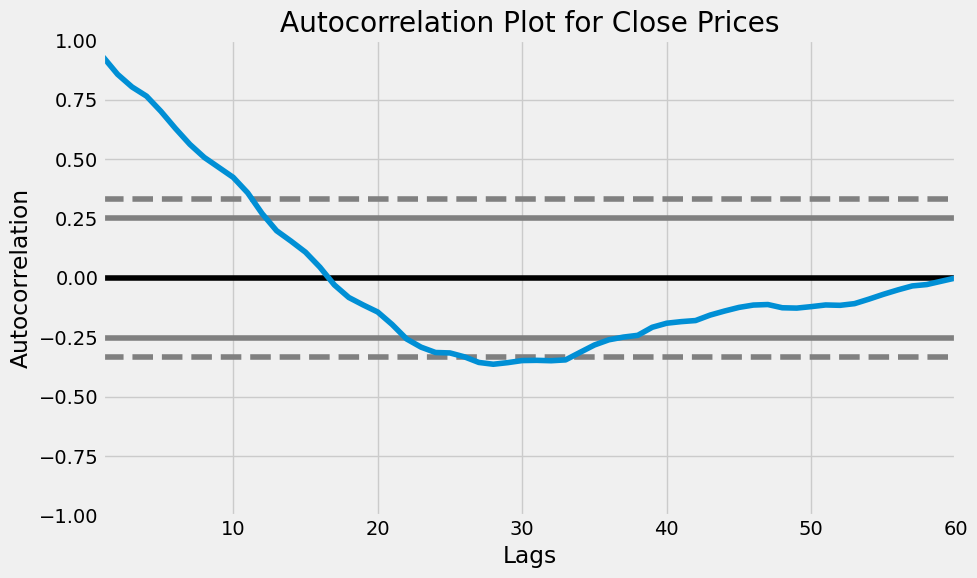

In [20]:
plt.figure(figsize=(10, 6))  
autocorrelation_plot(TSLA['Close'])
plt.title('Autocorrelation Plot for Close Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)  
plt.tight_layout()  
plt.show()

# **Plotting Partial Autocorrelations**

<Figure size 1000x600 with 0 Axes>

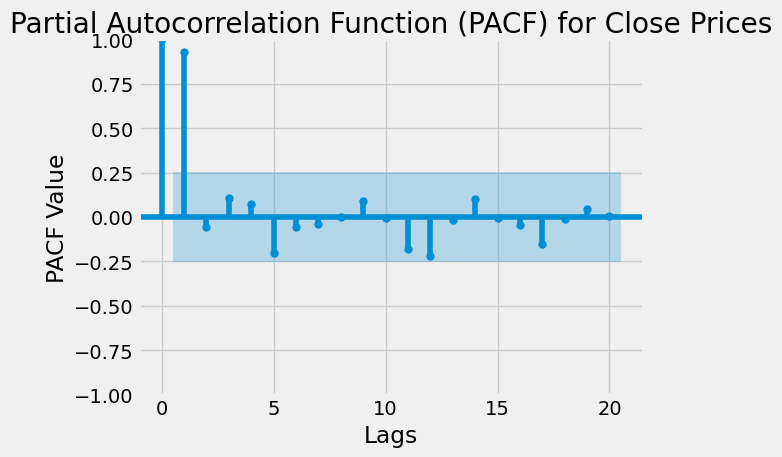

In [21]:
plt.figure(figsize=(10, 6)) 
plot_pacf(TSLA['Close'], lags=20)
plt.title('Partial Autocorrelation Function (PACF) for Close Prices')
plt.xlabel('Lags')
plt.ylabel('PACF Value')
plt.grid(True)  

plt.tight_layout()  
plt.show()

# **Time Series Decomposition**

In [26]:
rcParams['figure.figsize'] = 9, 11  # resizing the image to be big enough

Decompose the time series using a model of your choice. Here we're using an additive model.

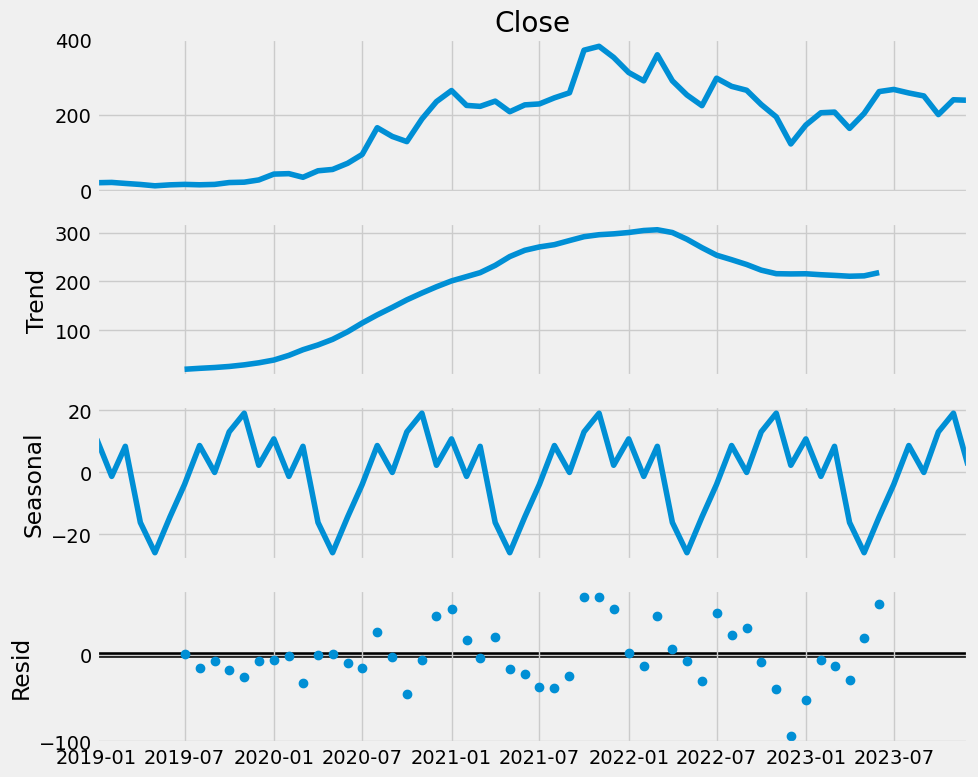

In [27]:
decomposition = sm.tsa.seasonal_decompose(TSLA['Close'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)  
plt.tight_layout() 
plt.show()

> **Seasonality component in time series**

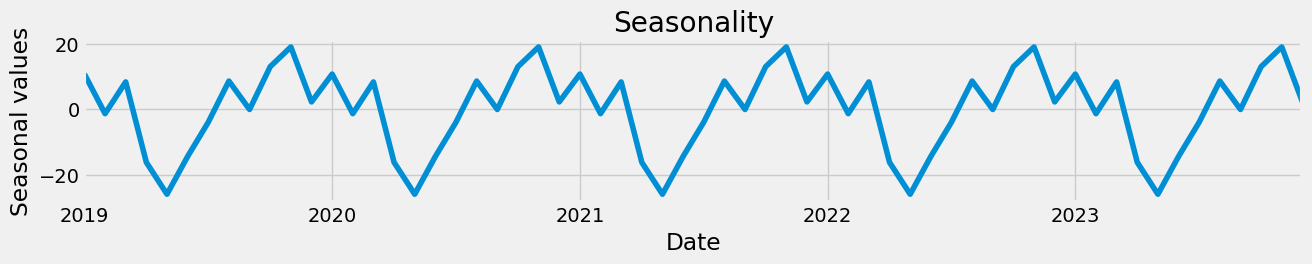

In [28]:
decomp_seasonal = decomposition.seasonal
ax = decomp_seasonal.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonal values')
ax.set_title('Seasonality')
plt.show()

> **Trend component in time series**

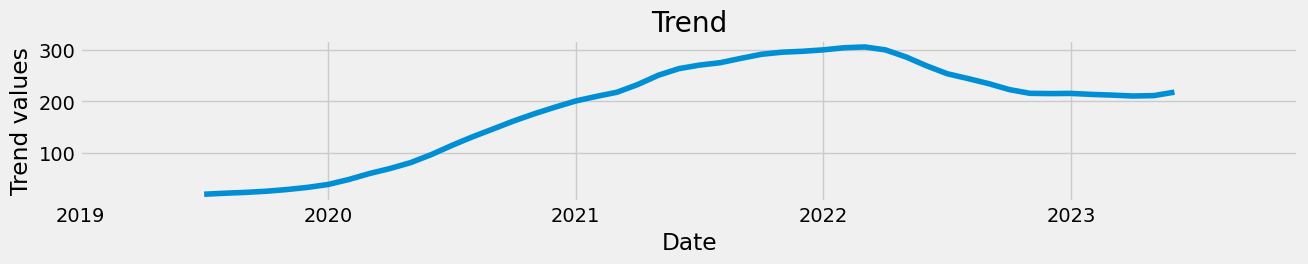

In [29]:
decomp_trend = decomposition.trend
ax = decomp_trend.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend values')
ax.set_title('Trend')
plt.show()

> **Noise component in time series**

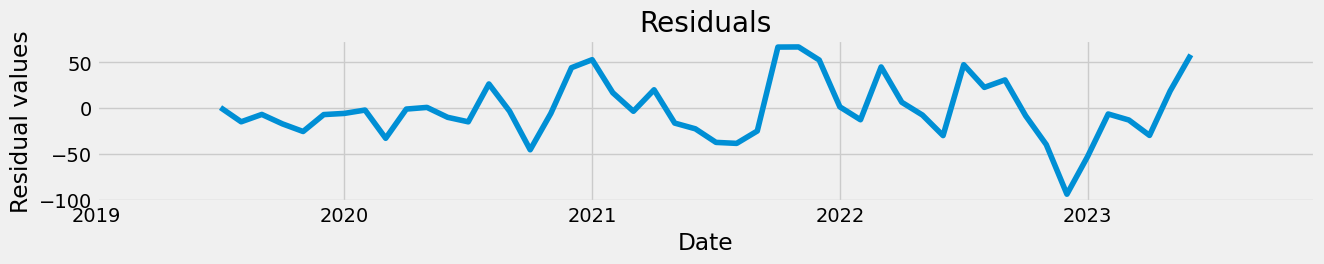

In [30]:
decomp_resid = decomposition.resid
ax = decomp_resid.plot(figsize=(14, 2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual values')
ax.set_title('Residuals')
plt.show()


# **Decomposition of Time Series**

# **Choose the model based on whether the seasonality is additive or multiplicative**

Here, we choose additive

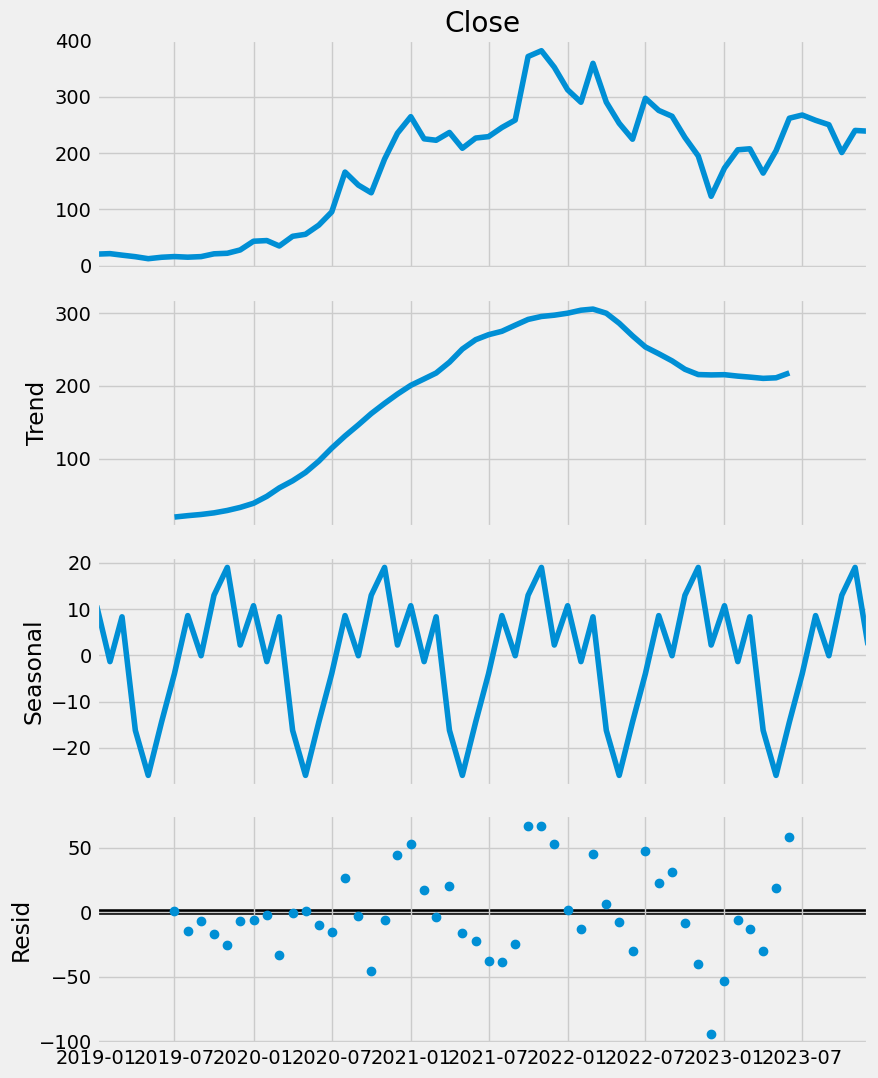

In [31]:
result = seasonal_decompose(TSLA['Close'], model='additive', period=12)
result.plot()
plt.show()

 Here, we choose multiplicative

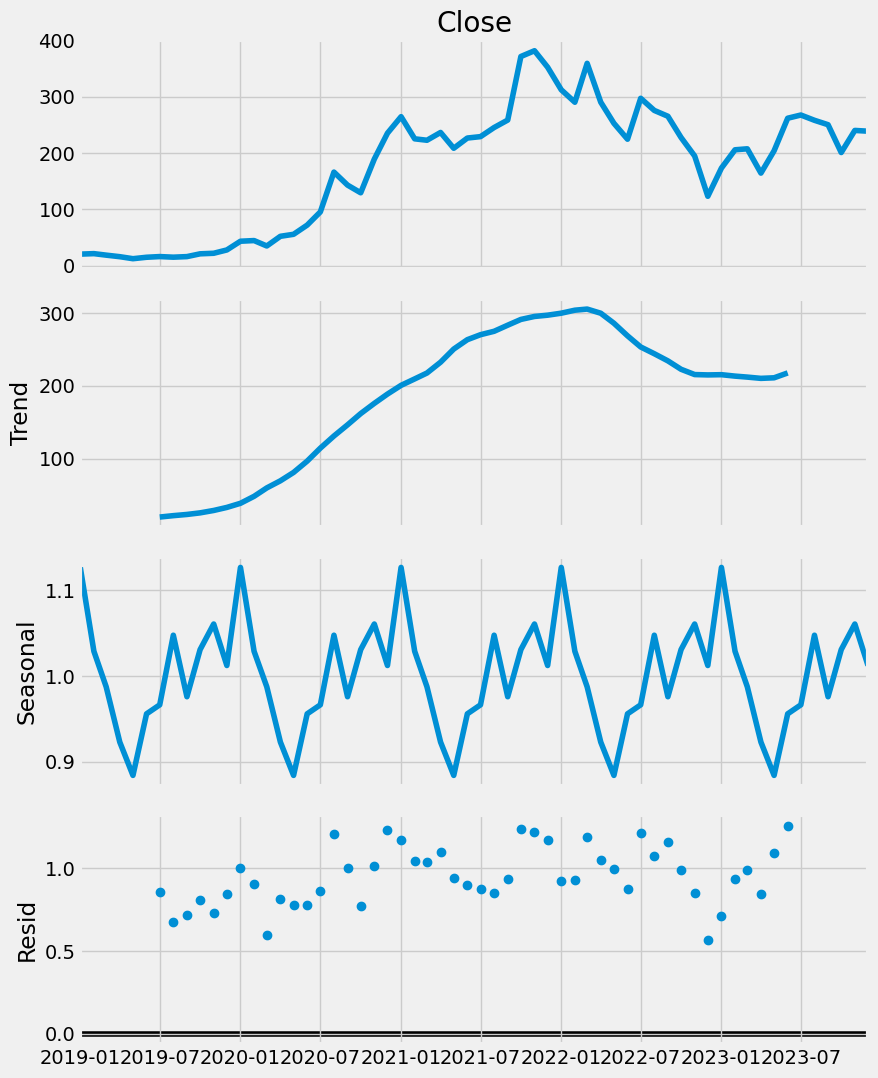

In [32]:
result = seasonal_decompose(TSLA['Close'], model='multiplicative', period=12)
result.plot()
plt.show()

# **Naive Method Forecasting Function**

In [33]:
def naive_method(data, nforecast):
    forecast = [data.iloc[-1]]  # Initial forecast is the last observed point
    for _ in range(nforecast - 1):
        forecast.append(forecast[-1])
    return forecast

In [34]:
test_len = 12
train = TSLA.iloc[:-test_len]
test = TSLA.iloc[-test_len:]

> **Applying the Naive Method**

In [35]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = naive_method(train['Close'], nforecast=test_len)

> **Visualizing the forecast**

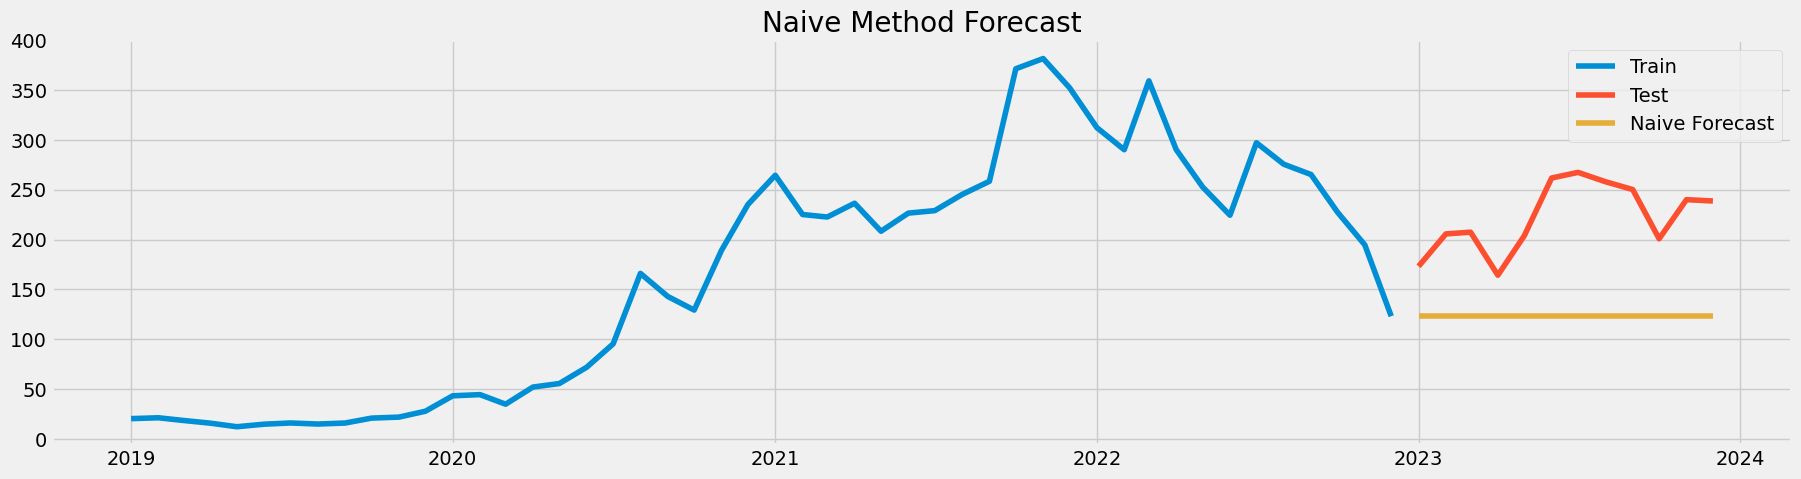

In [36]:
plt.figure(figsize=(20, 5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.title('Naive Method Forecast')
plt.legend()
plt.show()


> **Accuracy Metrics for Naive Method**

In [37]:
rmse_naive = np.sqrt(mean_squared_error(test['Close'], y_hat_naive['naive_forecast']))
mape_naive = np.mean(np.abs(test['Close'] - y_hat_naive['naive_forecast']) / test['Close']) * 100
mae_naive = np.mean(np.abs(test['Close'] - y_hat_naive['naive_forecast']))

# **Average of all historical data Method Forecasting Function**

In [38]:
def average_historical_method(data, nforecast):
    average = data.mean()
    forecast = [average] * nforecast
    return forecast

> **Applying the Average Historical Method**

In [39]:
y_hat_avg_hist = test.copy()
y_hat_avg_hist['average_hist_forecast'] = average_historical_method(train['Close'], nforecast=test_len)

> **Visualizing the forecast**

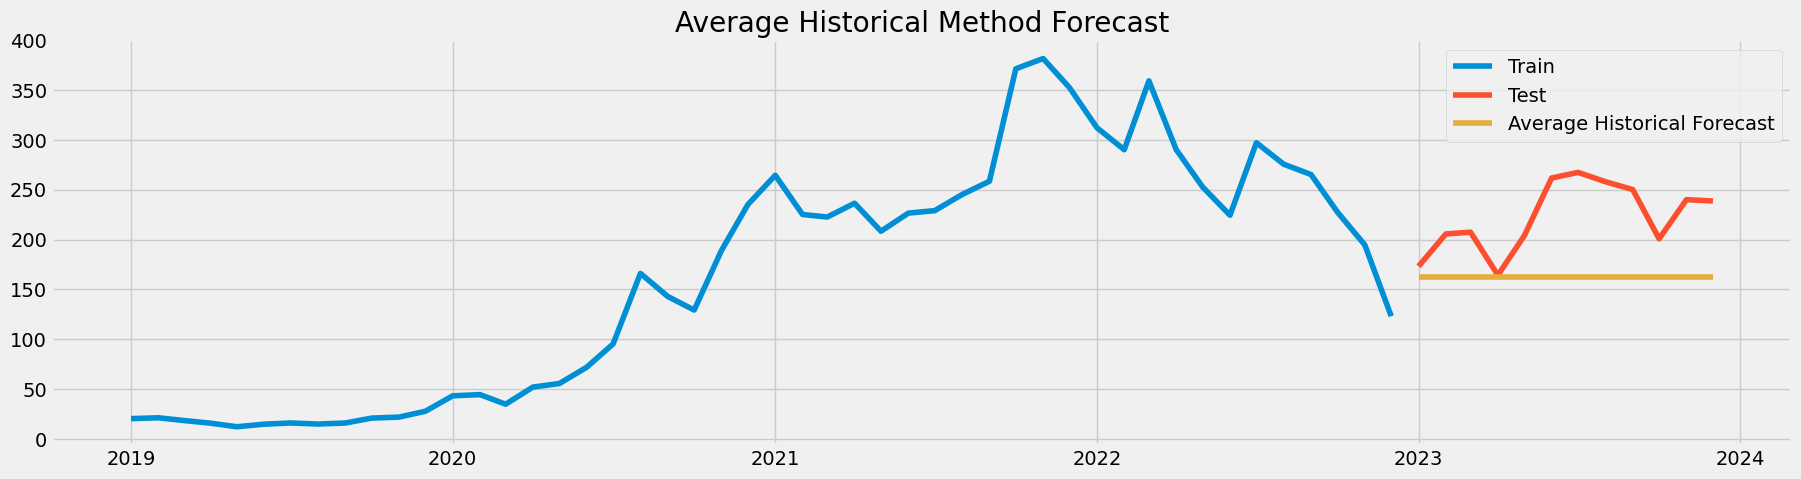

In [40]:
plt.figure(figsize=(20, 5))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg_hist['average_hist_forecast'], label='Average Historical Forecast')
plt.title('Average Historical Method Forecast')
plt.legend()
plt.show()

> **Accuracy Metrics for Average Historical Method**

In [41]:
rmse_avg_hist = np.sqrt(mean_squared_error(test['Close'], y_hat_avg_hist['average_hist_forecast']))
mape_avg_hist = np.mean(np.abs(test['Close'] - y_hat_avg_hist['average_hist_forecast']) / test['Close']) * 100
mae_avg_hist = np.mean(np.abs(test['Close'] - y_hat_avg_hist['average_hist_forecast']))

> **Compile Results into a DataFrame**

In [42]:
results = pd.DataFrame({
    'Method': ['Naive method', 'Average all historical Method'],
    'RMSE': [rmse_naive,rmse_avg_hist],
    'MAE': [mae_naive, mae_avg_hist],
    'MAPE': [mape_naive, mape_avg_hist]
})
print(results)

                          Method        RMSE        MAE       MAPE
0                   Naive method  104.892466  99.467498  43.328790
1  Average all historical Method   68.442266  59.797137  25.077715


# **Simple Average Method**

In [43]:
y_hat_MA_meth = test.copy()
ma_window = 12
y_hat_MA_meth['moving_avg_forecast'] = train['Close'].rolling(ma_window).mean().iloc[-1]
y_hat_MA_meth['moving_avg_forecast']

Date
2023-01-01    259.374441
2023-02-01    259.374441
2023-03-01    259.374441
2023-04-01    259.374441
2023-05-01    259.374441
2023-06-01    259.374441
2023-07-01    259.374441
2023-08-01    259.374441
2023-09-01    259.374441
2023-10-01    259.374441
2023-11-01    259.374441
2023-12-01    259.374441
Name: moving_avg_forecast, dtype: float64

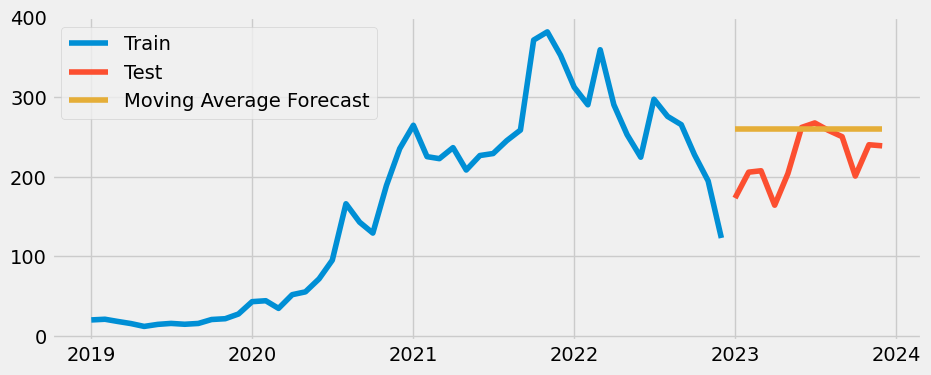

In [46]:
plt.figure(figsize=(10,4))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_MA_meth['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

# **ExponentialSmoothing**

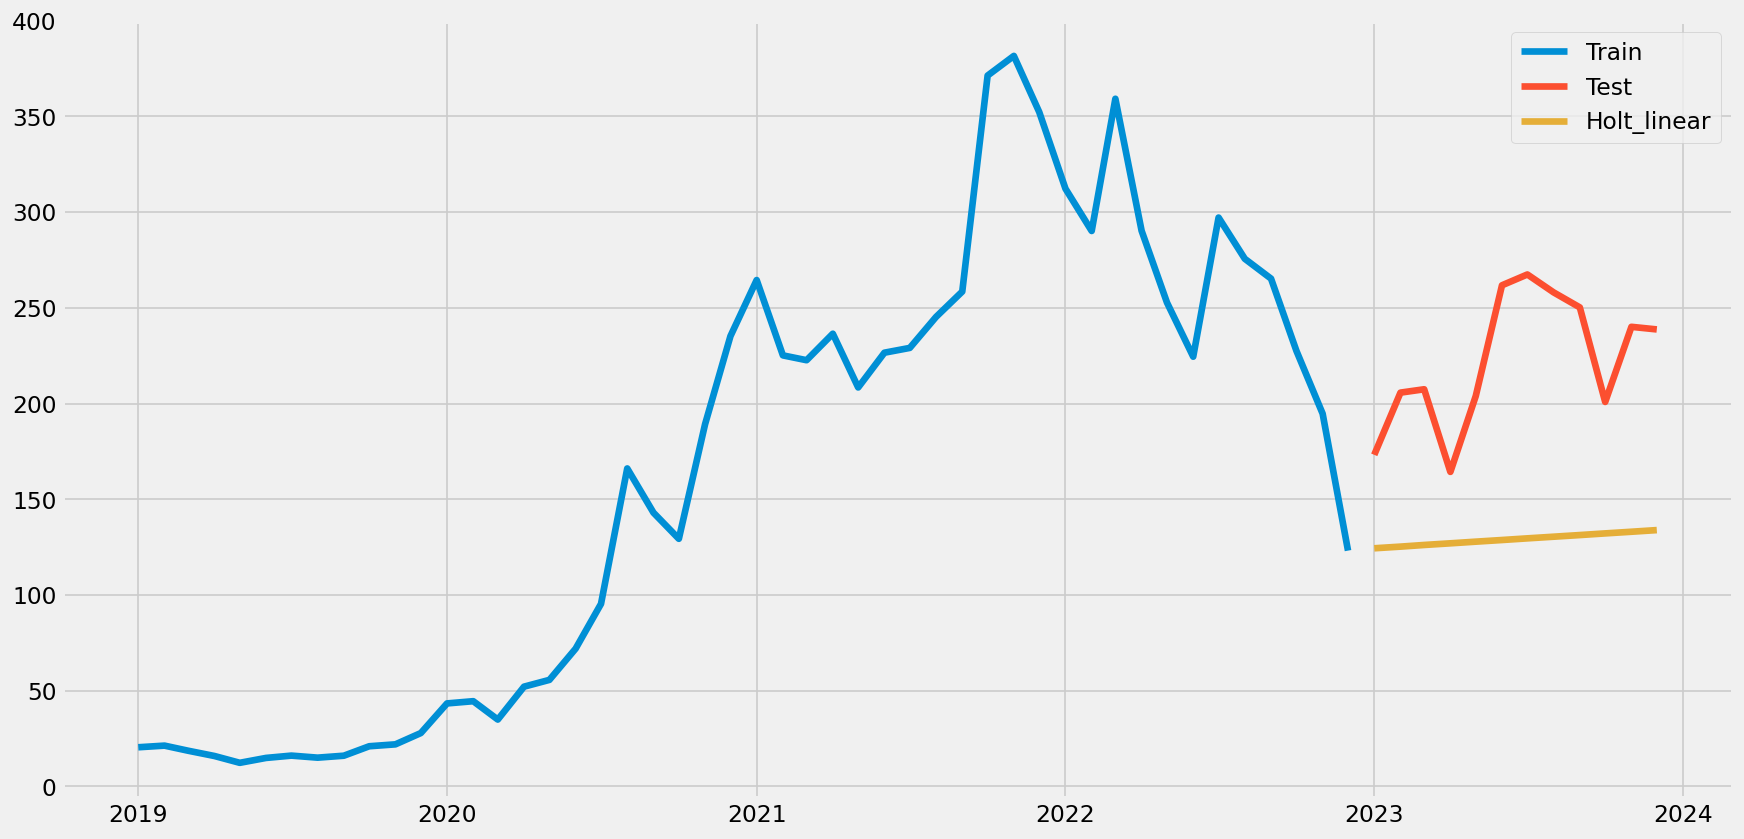

In [79]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()

#fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.1,smoothing_slope = 0.9)
fit1 = Holt(np.asarray(train['Close'])).fit()

y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [81]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_avg['Holt_linear'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_avg['Holt_linear'])/test['Close'])*100,2)
mae  = np.round(np.mean(np.abs(test['Close']-y_hat_avg['Holt_linear'])),2)

results = pd.DataFrame({'Method':['Holt Linear'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Holt Linear,98.71,93.49,40.71


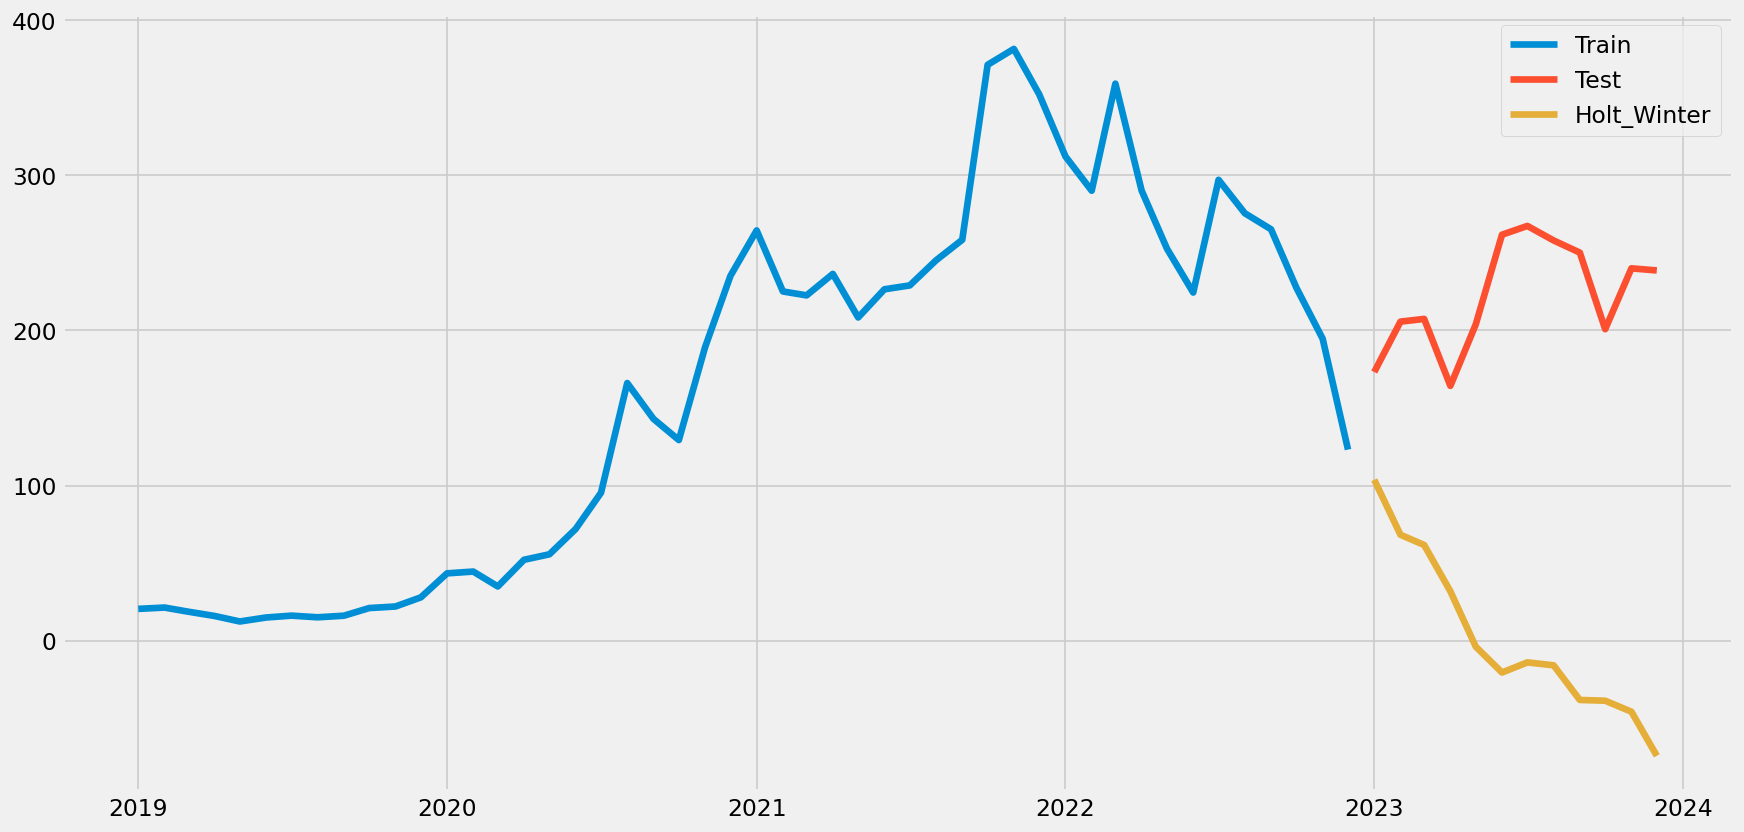

In [83]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
#fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=12 ,trend='mul', seasonal='mul',).fit() # trend and seasonal multiplicative

y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()


In [84]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Close'], y_hat_avg['Holt_Winter'])).round(2)
mape = np.round(np.mean(np.abs(test['Close']-y_hat_avg['Holt_Winter'])/test['Close'])*100,2)
mae  = np.round(np.mean(np.abs(test['Close']-y_hat_avg['Holt_Winter'])),2)

results = pd.DataFrame({'Method':['Holt Winter'], 'MAPE': [mape], 'RMSE': [rmse], 'MAE': [mae]})
results = results[['Method', 'RMSE', 'MAE', 'MAPE']]
results

,Method,RMSE,MAE,MAPE
0,Holt Winter,234.54,221.5,96.99


The article provides an overview of the ARIMA model, which stands for Auto Regressive Integrated Moving Average. This model is part of a family of models used for forecasting time series data by relying on the data's own past values, known as lags, and the lagged forecast errors. The ARIMA model is defined by three parameters: p, d, and q. The 'p' value denotes the order of the Auto Regressive term, 'q' represents the order of the Moving Average term, and 'd' signifies the number of differencing operations needed to render the time series stationary. The primary step in applying the ARIMA model is to ensure the time series data is stationary, commonly achieved through differencing. The 'd' parameter indicates how many differencing steps are necessary for this; if the series is already stationary, then 'd' is zero. To assess the stationarity of a time series, the Augmented Dickey-Fuller Test is used. This test is aimed at validating the Null Hypothesis, which posits that the series is non-stationary and needs differencing. If the p-value in this test is less than 0.05, which is the threshold for significance, the Null Hypothesis is rejected, indicating that the series does not require differencing and is already stationary.

> **statsmodels library provide successful implementation of the ADF test using the function adfuller in statsmodels.tsa.seasonal**

In [85]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Close.dropna())
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: -1.566066
p-value: 0.500614


The p-value, at 0.500614, exceeds the significance level of 0.05. This means that the null hypothesis, which assumes the time series is non-stationary, cannot be dismissed. Consequently, the time series requires differencing. The appropriate level of differencing is determined by examining the Auto Correlation Function (ACF) plot, specifically looking for the point where it approaches zero relatively quickly. A time series that exhibits positive autocorrelations for numerous lags may need additional differencing. On the other hand, if the autocorrelation at a single lag is excessively negative, this could indicate the series is over-differenced. To identify the correct order of differencing necessary to achieve stationarity in the time series, the autocorrelation function will be plotted and analyzed.

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

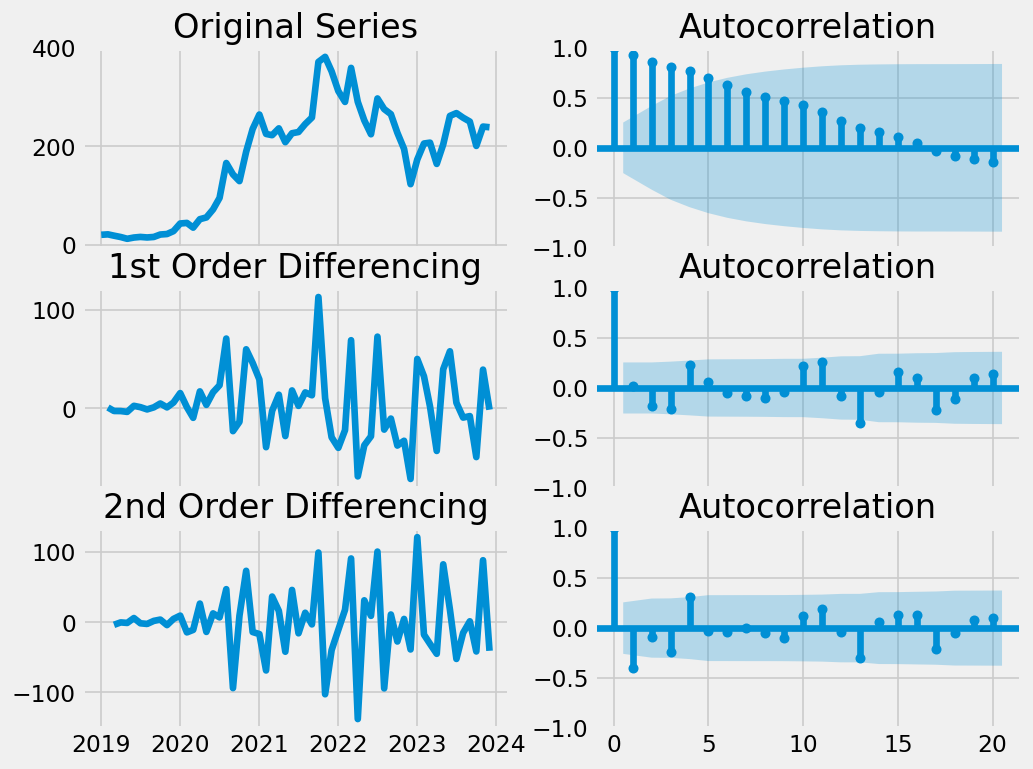

In [87]:
fig, axes = plt.subplots(3, 2, sharex='col')
#Original Series(0 order differncing)
axes[0, 0].plot(df.Close); axes[0, 0].set_title('Original Series')
plot_acf(df.Close, lags = 20, ax=axes[0, 1])
# 1st order differncing
axes[1, 0].plot(df.Close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Close.diff().dropna(), lags = 20, ax=axes[1, 1])
# 2nd order differncing
axes[2, 0].plot(df.Close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Close.diff().diff().dropna(), lags = 20, ax=axes[2, 1])
plt.show()


In this analysis, when comparing the three plots, it is evident that the Autocorrelation Function (ACF) plot stabilizes around zero after differencing once. If the series is differenced a second time, the immediate lag turns significantly negative, indicating that the series has been over-differenced at the second order. This suggests that the optimal approach is to stop after one differencing. Consequently, the time series becomes stationary with an order of differencing of one, meaning d=1. Additionally, the stationarity of the time series post-differencing can be further verified using the Augmented Dickey-Fuller (Adfuller) test. This test will help confirm whether the series has achieved stationarity after the applied differencing.

In [88]:
result = adfuller(TSLA.Close.diff().dropna())
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: -3.491935
p-value: 0.008197


In this case, the p-value is 0.008197, which is below the threshold of 0.05, indicating that the time series is now stationary. 

The next step involves determining the best value for 'p', the count of Autoregressive (AR) terms in the model. This is accomplished by creating a Partial Auto Correlation Function (PACF) plot. By examining the PACF plot, the appropriate order for the AR terms can be established. This is done by identifying the number of lags that surpass a certain level of significance in the plot, which will inform the optimal 'p' value for the ARIMA model.

> **PACF plot of 1st differenced series**

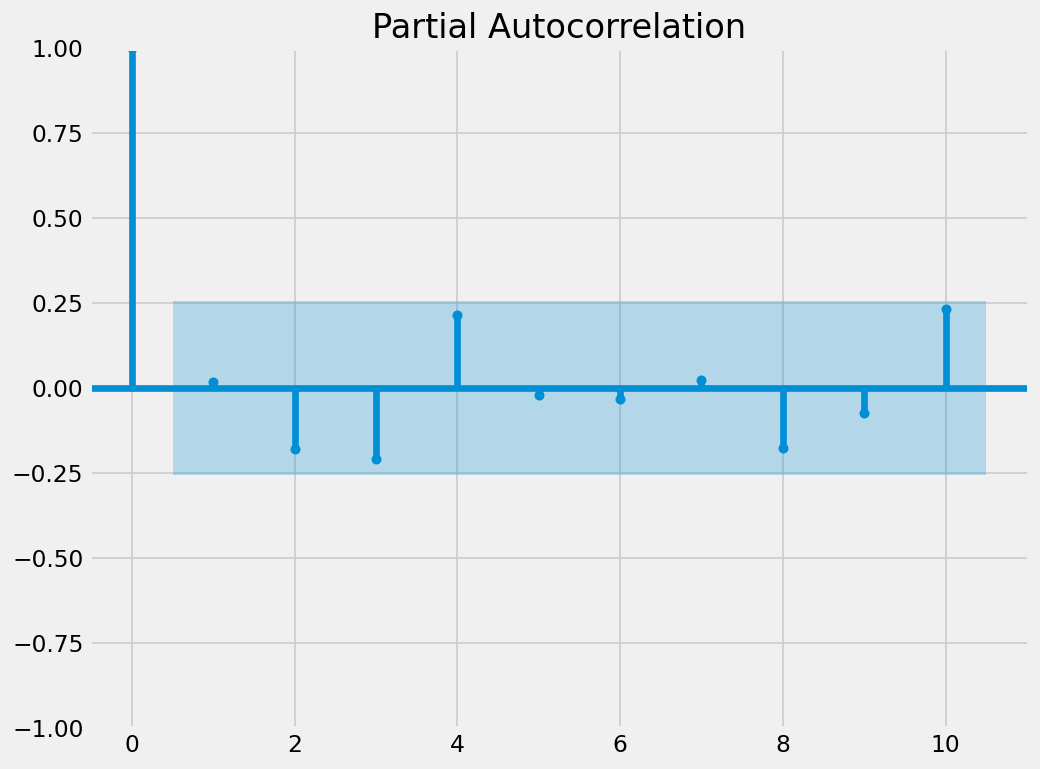

In [89]:
plot_pacf(TSLA.Close.diff().dropna(),lags=10)
#PACF plot of 2nd differncing order series
#plot_pacf(df.Close.diff().diff().dropna(),lags=10)
plt.show()

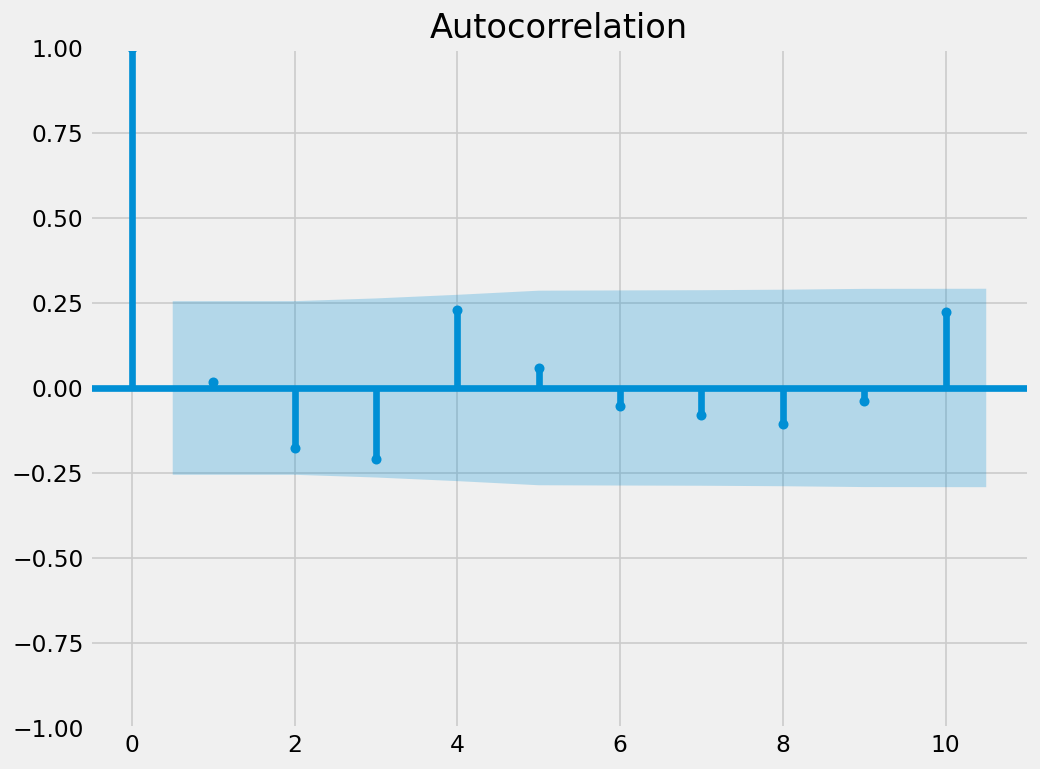

In [90]:
plot_acf(TSLA.Close.diff().dropna(),lags=10)
plt.show()

Here, we can see that the lag 1 is out of the significant limit(which is the shaded region) and second lag is in the shaded region, so we can select order of autoregressive terms as 1 i.e. p=1

In [91]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model = ARIMA(TSLA.Close, order=(0,1,0))#likelihoog =-424.762
#model = ARIMA(df.Close, order=(1,2,5))#likelihoog =-424.570(small negative is better likelihood)
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   60
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -293.626
Date:                Sun, 28 Jan 2024   AIC                            589.253
Time:                        14:18:35   BIC                            591.330
Sample:                    01-01-2019   HQIC                           590.063
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1230.9776    187.330      6.571      0.000     863.818    1598.137
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.91
Prob(Q):                              0.89   Pr

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


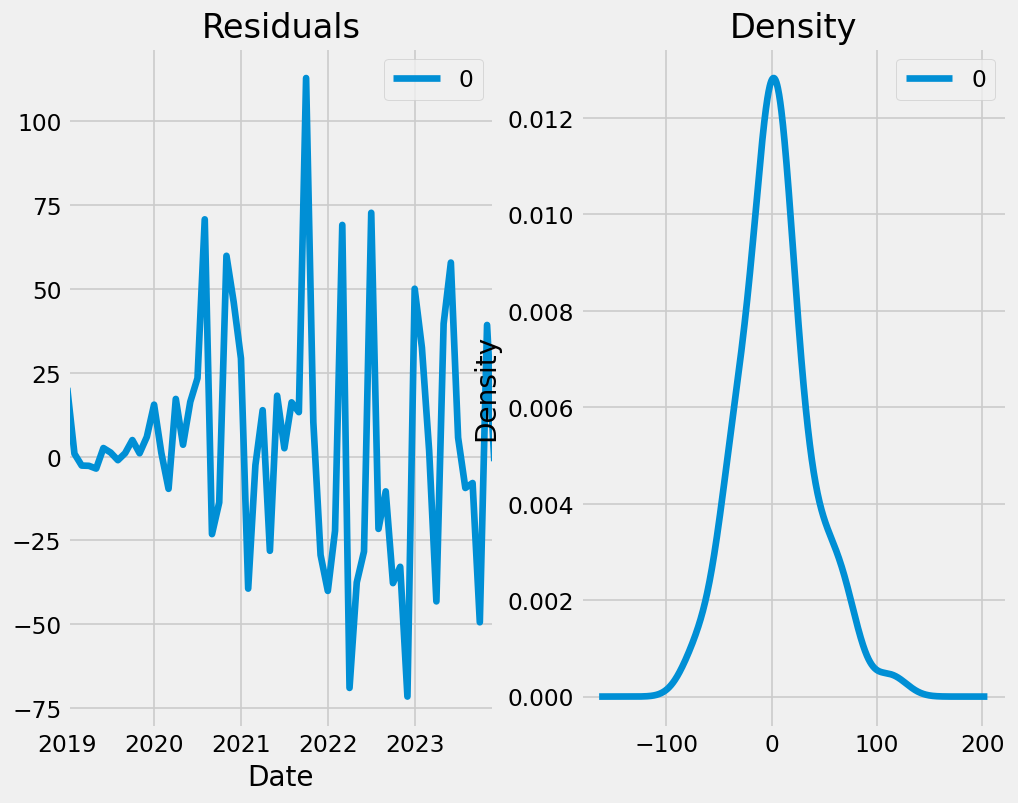

In [92]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [93]:
from statsmodels.tsa.stattools import acf

total = len(df)
num_obs_ahead = 12 # 12 months
dif = total - num_obs_ahead

# Create Training and Test
train = df.Close[:dif]
test = df.Close[dif:]

> **Build Model**

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


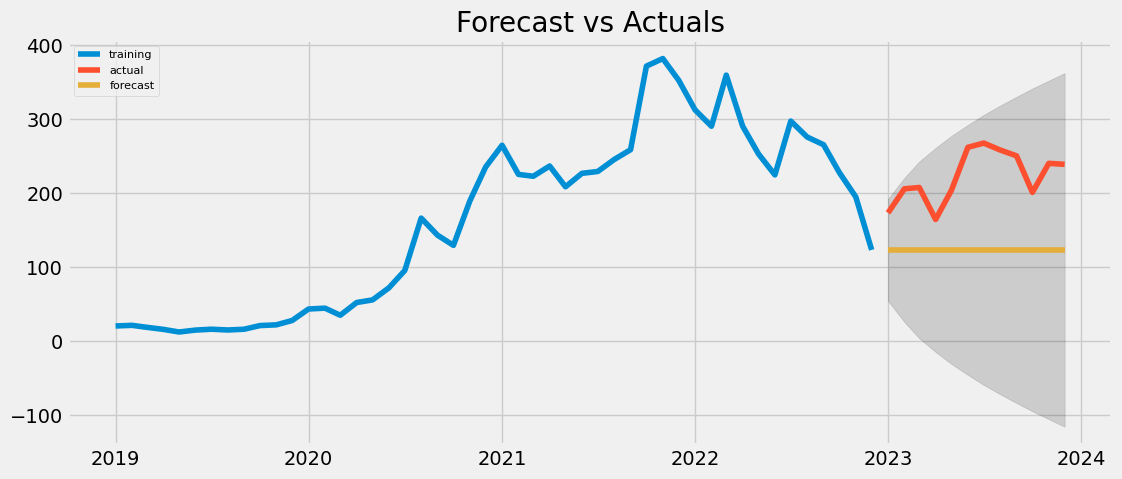

In [94]:
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(0, 1, 0))  
fitted = model.fit()  

fc = fitted.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)#(dpi for better picture)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [95]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc.values, test.values)

{'mape': 0.43328789700994946,
 'me': -99.46749791666667,
 'mae': 99.46749791666667,
 'mpe': -0.43328789700994946,
 'rmse': 104.89246580665383,
 'acf1': 0.4475827111981182,
 'corr': 2.845328709604793e-16,
 'minmax': 0.4332878970099495}

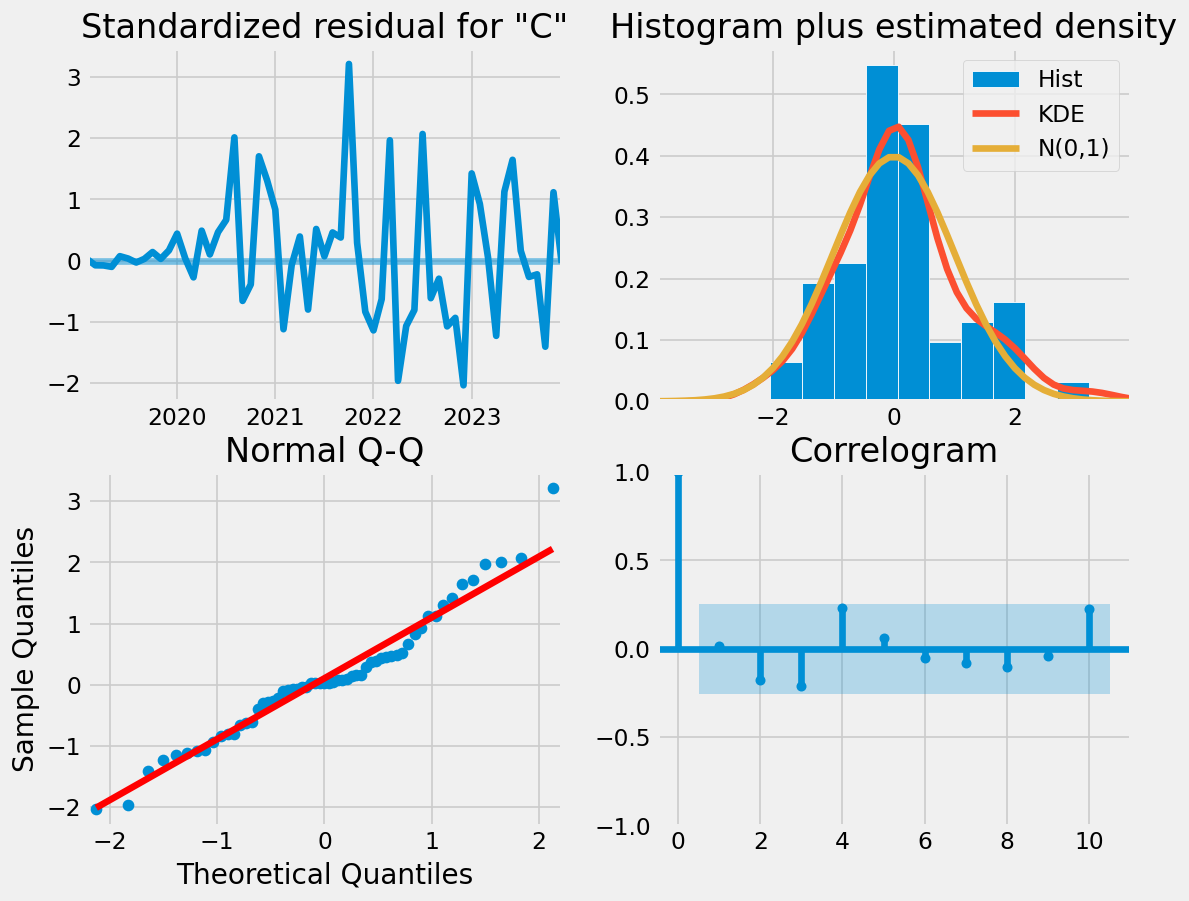

In [96]:
model_fit.plot_diagnostics(figsize=(10,8))
plt.show()

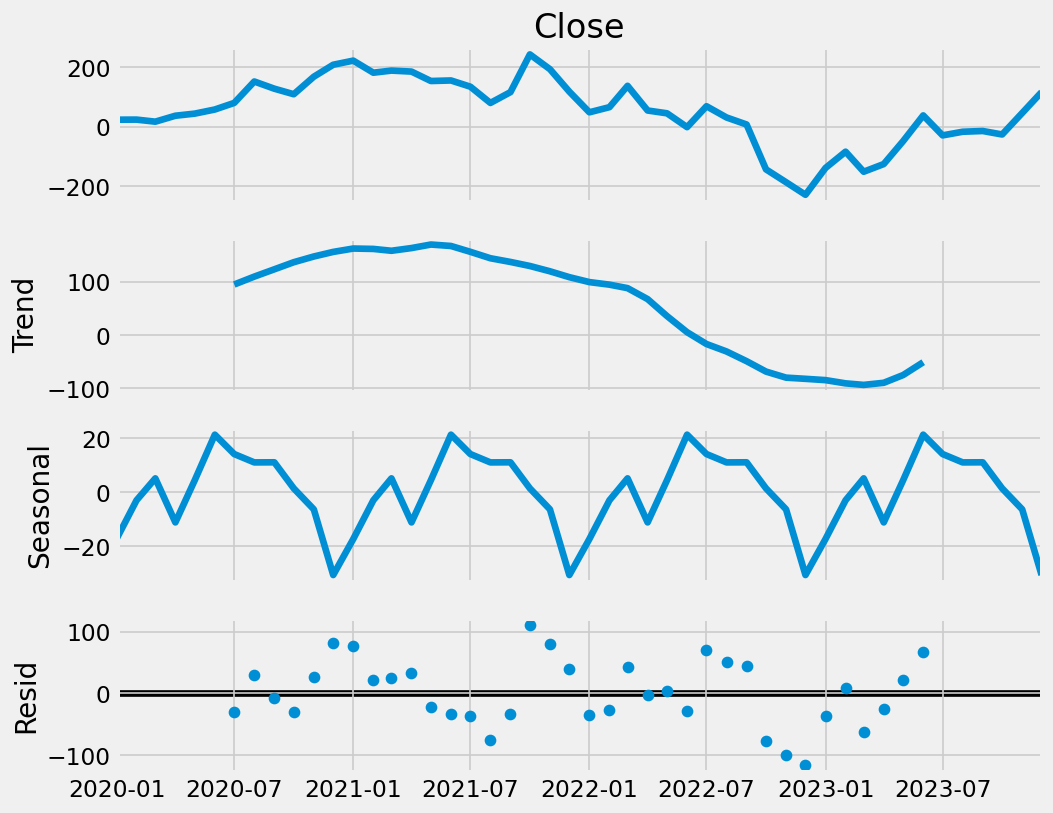

In [97]:
import statsmodels.api as sm

df_diff_seas = TSLA.Close.diff(12).dropna()
dec = sm.tsa.seasonal_decompose(df_diff_seas,period = 12)
dec.plot()
plt.show()

> **Fit the SARIMA model**

In [98]:
modsar = sm.tsa.statespace.SARIMAX(TSLA.Close, order=(1,1,1), seasonal_order=(1,1,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21744D+00    |proj g|=  2.10968D-01

At iterate    5    f=  4.15638D+00    |proj g|=  5.49026D-03

At iterate   10    f=  4.13148D+00    |proj g|=  9.65212D-02

At iterate   15    f=  4.09553D+00    |proj g|=  1.03128D-03

At iterate   20    f=  4.09543D+00    |proj g|=  1.00488D-04

At iterate   25    f=  4.09538D+00    |proj g|=  7.98789D-04

At iterate   30    f=  4.09536D+00    |proj g|=  1.68680D-04

At iterate   35    f=  4.09534D+00    |proj g|=  2.73897D-03

At iterate   40    f=  4.09500D+00    |proj g|=  8.42533D-03

At iterate   45    f=  4.09394D+00    |proj g|=  4.06687D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

In [99]:
# Fit the SARIMA model
modsar = sm.tsa.statespace.SARIMAX(TSLA.Close, order=(1,1,1), seasonal_order=(1,1,1,12))
modsar_fit = modsar.fit()
print(modsar_fit.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21744D+00    |proj g|=  2.10968D-01

At iterate    5    f=  4.15638D+00    |proj g|=  5.49026D-03

At iterate   10    f=  4.13148D+00    |proj g|=  9.65212D-02

At iterate   15    f=  4.09553D+00    |proj g|=  1.03128D-03

At iterate   20    f=  4.09543D+00    |proj g|=  1.00488D-04

At iterate   25    f=  4.09538D+00    |proj g|=  7.98789D-04

At iterate   30    f=  4.09536D+00    |proj g|=  1.68680D-04

At iterate   35    f=  4.09534D+00    |proj g|=  2.73897D-03

At iterate   40    f=  4.09500D+00    |proj g|=  8.42533D-03

At iterate   45    f=  4.09394D+00    |proj g|=  4.06687D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

> **Plot residual errors**

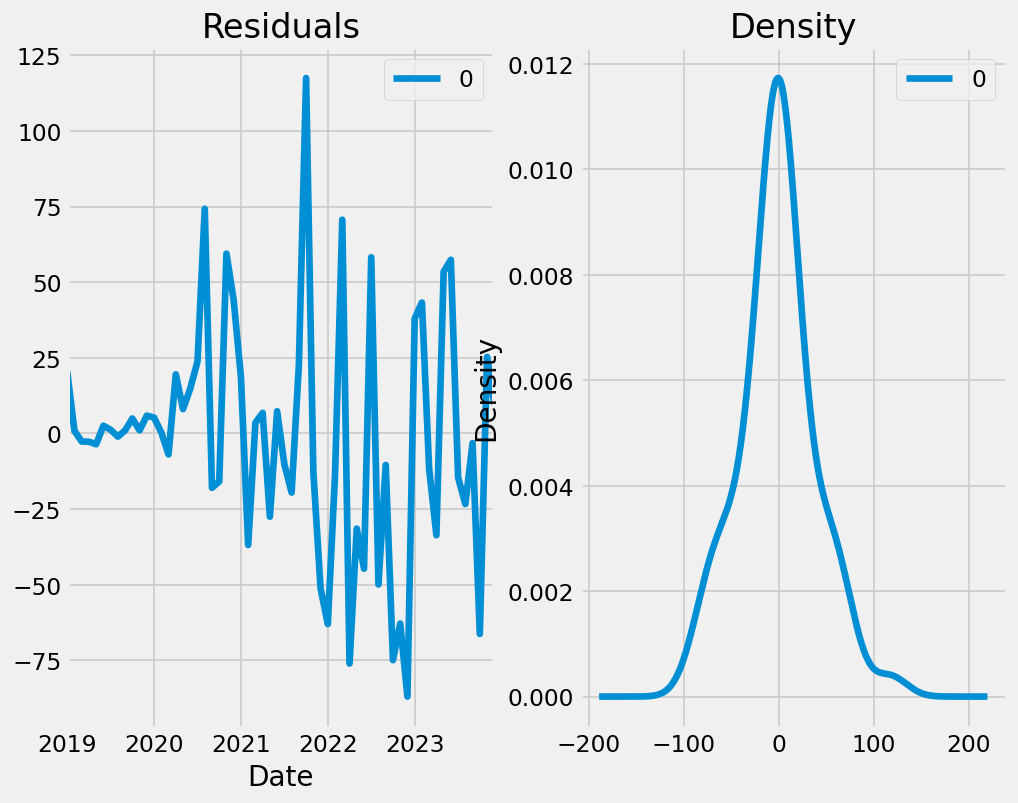

In [100]:
residuals_sar = pd.DataFrame(modsar_fit.resid)
fig, ax = plt.subplots(1,2)
residuals_sar.plot(title="Residuals", ax=ax[0])
residuals_sar.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

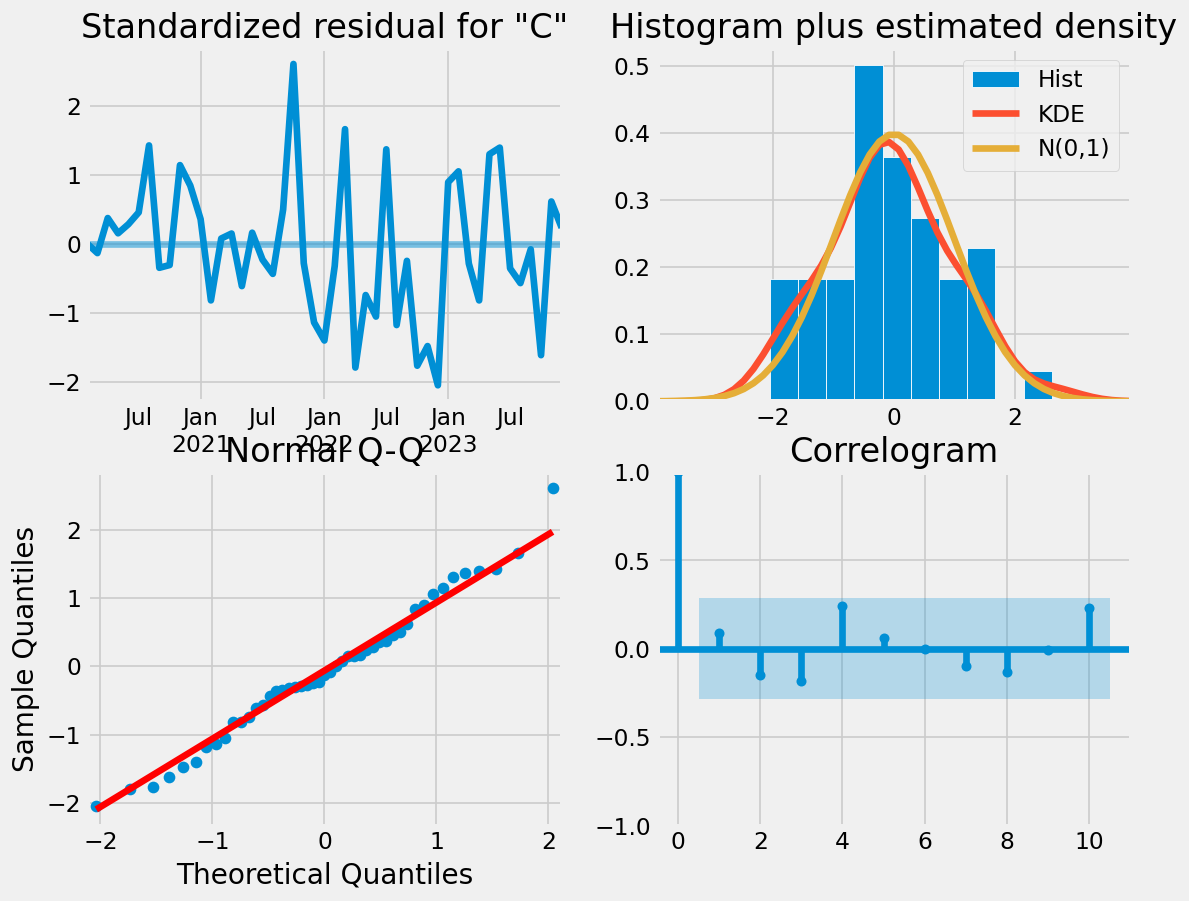

In [101]:
modsar_fit.plot_diagnostics(figsize=(10,8))
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarn

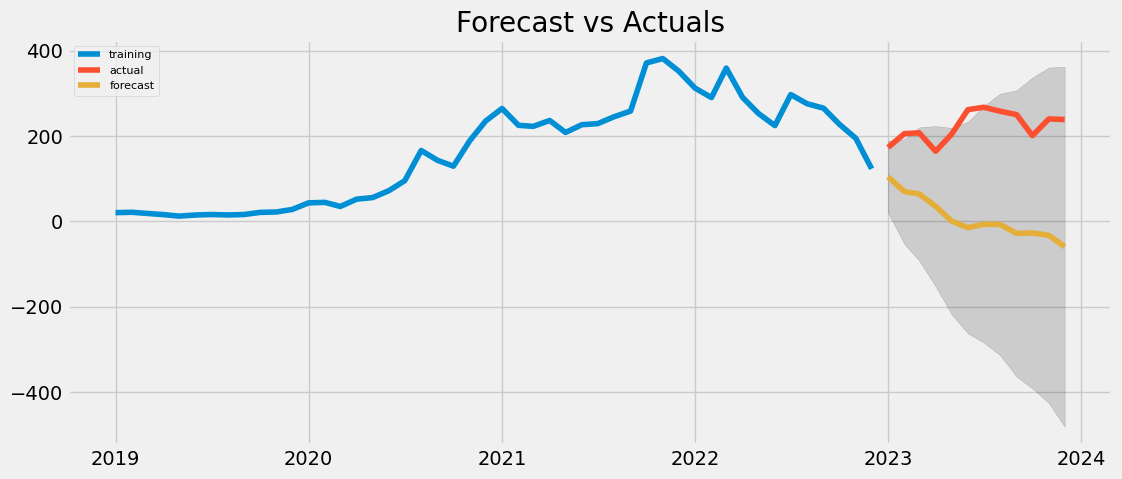

In [102]:
# Build the SARIMA model
modsar = ARIMA(train, order=(1, 1, 1), seasonal_order=(0,1,1,12))  
fitted_sar = modsar.fit()  


# Forecast
fc_sar = fitted_sar.forecast(num_obs_ahead, alpha=0.05)  # 95% conf
conf_ins = fitted_sar.get_forecast(num_obs_ahead).summary_frame()

# Make as pandas series
fc_series = pd.Series(fc_sar, index=test.index)
lower_series = pd.Series(conf_ins['mean_ci_lower'], index=test.index)
upper_series = pd.Series(conf_ins['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [103]:
forecast_accuracy(fc_sar.values, test.values)

{'mape': 0.9391860549687067,
 'me': -214.41572742644243,
 'mae': 214.41572742644243,
 'mpe': -0.9391860549687067,
 'rmse': 226.60925764189466,
 'acf1': 0.4475827111981182,
 'corr': -0.6483616598875314,
 'minmax': 0.9391860549687066}